# Image Scraping and Classification Project

##### Problem Statement: 

Images are one of the major sources of data in the field of data science and AI. This field is making appropriate use of information that can be gathered through images by examining its features and details. We are trying to give you an exposure of how an end to end project is developed in this field. 


The idea behind this project is to build a deep learning-based Image Classification model on images that will be scraped from e-commerce portal. This is done to make the model more and more robust. 
This task is divided into two phases: Data Collection and Mode Building. 
Data Collection Phase: In this section, you need to scrape images from e-commerce portal, Amazon.in. The clothing categories used for scraping will be:


Sarees (women)

Trousers (men)

Jeans (men)

You need to scrape images of these 3 categories and build your data from it. That data will be provided as an input to your deep learning problem. You need to scrape minimum 200 images of each categories. There is no maximum limit to the data collection.  You are free to apply image augmentation techniques to increase the size of your data but make sure the quality of data is not compromised. 
Remember, in case of deep learning models, the data needs to be big for building a good performing model. More the data, better the results.  

## Model Building Phase: 

###### After the data collection and preparation is done, you need to build an image classification model that will classify between these 3 categories mentioned above. You can play around with optimizers and learning rates for improving your model’s performance.  


In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
import os
import cv2

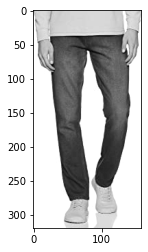

In [19]:
DATADIR = "/Users/utkarshvardhan/Desktop/Image classification and image scrapping"
CATEGORIES = ["jeans_men","trouser_men","saree_women"]

for category in CATEGORIES:
    path = os.path.join(DATADIR,category) # which is the path to 3 classifications
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

In [20]:
print(img_array)

[[231 163 213 ... 185 188 208]
 [255 172 201 ... 194 195 211]
 [255 188 186 ... 206 203 215]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [21]:
print(img_array.shape)

(320, 159)


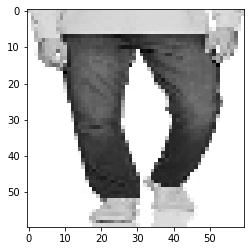

In [51]:
image_size= 60

new_array = cv2.resize(img_array,(image_size,image_size))
plt.imshow(new_array,cmap='gray')
plt.show()

In [52]:
training_data=[]

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(image_size,image_size))
                training_data.append([new_array , class_num])
            except Exception as e:
                pass
        
    
create_training_data()

In [53]:
print(len(training_data))

720


In [54]:
import random
random.shuffle(training_data)

In [55]:
for sample in training_data[:10]:
    print(sample[1])

0
2
0
0
1
1
1
1
0
1


In [56]:
X = []
y = []

In [57]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
print(X[0].reshape(-1, image_size, image_size, 1))
    
X = np.array(X).reshape(-1,image_size,image_size,1)
y = np.array(y)

[[[[255]
   [255]
   [255]
   ...
   [252]
   [ 30]
   [246]]

  [[255]
   [255]
   [255]
   ...
   [227]
   [125]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [243]
   [255]
   [255]]

  ...

  [[252]
   [186]
   [193]
   ...
   [255]
   [255]
   [255]]

  [[241]
   [218]
   [225]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [253]
   ...
   [255]
   [255]
   [255]]]]


In [58]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import time

In [59]:
X = X/255.0
y = y/255.0

In [60]:
print(X.max())
print(y.max())

1.0
0.00784313725490196


In [69]:
NAME = "jeans-vs-trouser-vs-saree-cnn-64*2-{}".format(int(time.time()))
tensorboard=TensorBoard(log_dir='logs/{}'.format(NAME))

model=Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Activation("sigmoid"))

model.add(Dense(128))
model.add(Activation("relu"))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

model.fit(X,y,batch_size=10,epochs=10,validation_split=.02, callbacks = [tensorboard])

Epoch 1/10
71/71 [==============================] - 3s 36ms/step - loss: 0.1236 - accuracy: 0.0693 - val_loss: 0.0403 - val_accuracy: 0.4667
Epoch 2/10
71/71 [==============================] - 2s 33ms/step - loss: 0.0612 - accuracy: 0.3335 - val_loss: 0.0403 - val_accuracy: 0.4667
Epoch 3/10
71/71 [==============================] - 2s 33ms/step - loss: 0.0614 - accuracy: 0.2905 - val_loss: 0.0403 - val_accuracy: 0.4667
Epoch 4/10
71/71 [==============================] - 2s 33ms/step - loss: 0.0606 - accuracy: 0.3330 - val_loss: 0.0403 - val_accuracy: 0.4667
Epoch 5/10
71/71 [==============================] - 2s 33ms/step - loss: 0.0613 - accuracy: 0.3246 - val_loss: 0.0403 - val_accuracy: 0.4667
Epoch 6/10
71/71 [==============================] - 2s 33ms/step - loss: 0.0603 - accuracy: 0.3402 - val_loss: 0.0403 - val_accuracy: 0.4667
Epoch 7/10
71/71 [==============================] - 2s 34ms/step - loss: 0.0653 - accuracy: 0.2920 - val_loss: 0.0403 - val_accuracy: 0.4667
Epoch 8/10
71

In [74]:

model=Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(64))
model.add(Activation("sigmoid"))

model.add(Dense(128))
model.add(Activation("sigmoid"))

model.add(Dense(128))
model.add(Activation("relu"))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['sparse_categorical_accuracy'])

model.fit(X,y,batch_size=5,epochs=5,validation_split=.03)

Epoch 1/5
140/140 [==============================] - 3s 17ms/step - loss: 1.5138 - sparse_categorical_accuracy: 0.2646 - val_loss: 0.0265 - val_sparse_categorical_accuracy: 0.4545
Epoch 2/5
140/140 [==============================] - 2s 16ms/step - loss: 0.0203 - sparse_categorical_accuracy: 0.3455 - val_loss: 0.0098 - val_sparse_categorical_accuracy: 0.4545
Epoch 3/5
140/140 [==============================] - 2s 16ms/step - loss: 0.0084 - sparse_categorical_accuracy: 0.3172 - val_loss: 0.0054 - val_sparse_categorical_accuracy: 0.4545
Epoch 4/5
140/140 [==============================] - 2s 16ms/step - loss: 0.0048 - sparse_categorical_accuracy: 0.3498 - val_loss: 0.0034 - val_sparse_categorical_accuracy: 0.4545
Epoch 5/5
140/140 [==============================] - 2s 16ms/step - loss: 0.0032 - sparse_categorical_accuracy: 0.3266 - val_loss: 0.0024 - val_sparse_categorical_accuracy: 0.4545


In [79]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])


In [81]:
prediction = probability_model.predict(X)

In [83]:
prediction[:5]

array([[9.9757260e-01, 1.9110968e-05, 1.9110968e-05, 1.9110968e-05,
        1.9110968e-05, 1.9110968e-05, 1.9110968e-05, 1.9110968e-05,
        1.9110968e-05, 1.9110968e-05, 1.9110968e-05, 1.9110968e-05,
        1.9110968e-05, 1.9110968e-05, 1.9110968e-05, 1.9110968e-05,
        1.9110968e-05, 1.9110968e-05, 1.9110968e-05, 1.9110968e-05,
        1.9110968e-05, 1.9110968e-05, 1.9110968e-05, 1.9110968e-05,
        1.9110968e-05, 1.9110968e-05, 1.9110968e-05, 1.9110968e-05,
        1.9110968e-05, 1.9110968e-05, 1.9110968e-05, 1.9110968e-05,
        1.9110968e-05, 1.9110968e-05, 1.9110968e-05, 1.9110968e-05,
        1.9110968e-05, 1.9110968e-05, 1.9110968e-05, 1.9110968e-05,
        1.9110968e-05, 1.9110968e-05, 1.9110968e-05, 1.9110968e-05,
        1.9110968e-05, 1.9110968e-05, 1.9110968e-05, 1.9110968e-05,
        1.9110968e-05, 1.9110968e-05, 1.9110968e-05, 1.9110968e-05,
        1.9110968e-05, 1.9110968e-05, 1.9110968e-05, 1.9110968e-05,
        1.9110968e-05, 1.9110968e-05, 1.9110968e

In [84]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [85]:
pickle_in= open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in= open("y.pickle","rb")
y = pickle.load(pickle_in)

In [91]:
X

array([[[[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [0.98823529],
         [0.11764706],
         [0.96470588]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [0.89019608],
         [0.49019608],
         [1.        ]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [0.95294118],
         [1.        ],
         [1.        ]],

        ...,

        [[0.98823529],
         [0.72941176],
         [0.75686275],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[0.94509804],
         [0.85490196],
         [0.88235294],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[1.        ],
         [1.        ],
         [0.99215686],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]]],


       [[[1.        ],
         [1.        ],
         [1.  

In [90]:
y

array([0.        , 0.00784314, 0.        , 0.        , 0.00392157,
       0.00392157, 0.00392157, 0.00392157, 0.        , 0.00392157,
       0.00784314, 0.        , 0.00784314, 0.00784314, 0.00392157,
       0.00784314, 0.        , 0.00784314, 0.00784314, 0.00784314,
       0.        , 0.00784314, 0.00392157, 0.        , 0.00784314,
       0.00392157, 0.00392157, 0.        , 0.        , 0.00392157,
       0.00784314, 0.00392157, 0.        , 0.        , 0.00784314,
       0.00784314, 0.00784314, 0.00784314, 0.00784314, 0.00784314,
       0.        , 0.00392157, 0.00392157, 0.        , 0.00784314,
       0.00392157, 0.        , 0.00784314, 0.00784314, 0.00392157,
       0.        , 0.00784314, 0.        , 0.        , 0.        ,
       0.00784314, 0.00784314, 0.00784314, 0.00784314, 0.00784314,
       0.00392157, 0.00392157, 0.00784314, 0.00392157, 0.        ,
       0.        , 0.        , 0.00392157, 0.00784314, 0.00784314,
       0.00392157, 0.00784314, 0.        , 0.        , 0.00784